In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Matplotlib styles

In [2]:
plt.style.use(["classic", "seaborn"])

# Graduates of the Bolivarian University of Venezuela 2006 - 2017

In this jupyter-notebook we seek to make an exploratory data analysis where with the data set provided by the web page ['datos.gob.ve'][1] we will carry out a small study of the students who graduated from the Bolivarian University of Venezuela in the period between 2006 - 2017.

It should be noted that this study is for purely educational purposes to develop the ability to analyze data with python.

[1]: http://www.datos.gob.ve/dataset/egresados-universidad-bolivariana-de-venezuela

## First look at the data

In [3]:
data_path = os.path.abspath("../data")
graduates2006_2017 = pd.read_csv(f"{data_path}/graduates_UBV_2006_2017.csv")

/tmp/ipykernel_6035/2056919262.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates2006_2017 = pd.read_csv(f"{data_path}/graduates_UBV_2006_2017.csv")


After the union of the data in a single DataFrame in the 'data_union.ipynb' notebook we take a quick look at the product of that process with which we can see a couple of problems that we must solve first:

1. The row of Features is repeated twice.
2. We have a column 'Named: 0' that repeats the index of the DataFrame.

In addition to these two problems, we must do a more exhaustive cleaning, however, we will start first with the two previous points.

In [4]:
graduates2006_2017

,Unnamed: 0,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,CÓDIGO,TITULO,AÑO DE EGRESO,TIPO ALDEA,COHORTE,GRADO ACADÉMCO,MENCIÓN
0,0,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,0,TITULO,AÑO DE EGRESO,NaN,COHORTE,GRADO ACADÉMCO,MENCIÓN
1,1,VENEZOLANA,DELGADO DE ALVAREZ,GLADYS DE LA CRUZ,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
2,2,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION DE MEDIOS,2016,NaN,NaN,NaN,NaN
3,3,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION MEDIOS DE,2016,NaN,NaN,NaN,NaN
4,4,VENEZOLANA,ARVELAIZ DE AVILA,MARIA DE LOS SANTOS,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428305,428305,VENEZOLANA,RIVERO RANGEL,JIMI ENDRI,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428306,428306,VENEZOLANA,SEMPRUM CALDERA,NEOMAR SEGUNDO,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428307,428307,VENEZOLANA,SUAREZ PEREZ,JAVIER ENRIQUE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428308,428308,VENEZOLANA,VERA,KENDRI JOSE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M


### Fixed Header Row left over

In [5]:
graduates2006_2017.drop(index=0, axis=0, inplace=True)
graduates2006_2017

,Unnamed: 0,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,CÓDIGO,TITULO,AÑO DE EGRESO,TIPO ALDEA,COHORTE,GRADO ACADÉMCO,MENCIÓN
1,1,VENEZOLANA,DELGADO DE ALVAREZ,GLADYS DE LA CRUZ,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
2,2,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION DE MEDIOS,2016,NaN,NaN,NaN,NaN
3,3,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION MEDIOS DE,2016,NaN,NaN,NaN,NaN
4,4,VENEZOLANA,ARVELAIZ DE AVILA,MARIA DE LOS SANTOS,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
5,5,VENEZOLANA,BLANCO DE CARRILLO,CELINA MERCEDES,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428305,428305,VENEZOLANA,RIVERO RANGEL,JIMI ENDRI,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428306,428306,VENEZOLANA,SEMPRUM CALDERA,NEOMAR SEGUNDO,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428307,428307,VENEZOLANA,SUAREZ PEREZ,JAVIER ENRIQUE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428308,428308,VENEZOLANA,VERA,KENDRI JOSE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M


### We fixed the leftover index column

In [6]:
graduates2006_2017.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
graduates2006_2017

,NACIONALIDAD,NOMBRES,APELLIDOS,ESTADO,CAPITAL,CÓDIGO,TITULO,AÑO DE EGRESO,TIPO ALDEA,COHORTE,GRADO ACADÉMCO,MENCIÓN
1,VENEZOLANA,DELGADO DE ALVAREZ,GLADYS DE LA CRUZ,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
2,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION DE MEDIOS,2016,NaN,NaN,NaN,NaN
3,VENEZOLANA,JIMENEZ JIMENEZ,MAYERLING NATHALI,DISTRITO CAPITAL,CARACAS,CSO,PRODUCCION MEDIOS DE,2016,NaN,NaN,NaN,NaN
4,VENEZOLANA,ARVELAIZ DE AVILA,MARIA DE LOS SANTOS,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
5,VENEZOLANA,BLANCO DE CARRILLO,CELINA MERCEDES,GUARICO,SAN JUAN DE LOS MORROS,GSO,LICENCIADO EN GESTION SOCIAL DEL DESARROLLO,2016,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
428305,VENEZOLANA,RIVERO RANGEL,JIMI ENDRI,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428306,VENEZOLANA,SEMPRUM CALDERA,NEOMAR SEGUNDO,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428307,VENEZOLANA,SUAREZ PEREZ,JAVIER ENRIQUE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M
428308,VENEZOLANA,VERA,KENDRI JOSE,ZULIA,MARACAIBO,INF,INFORMATICA PARA LA GESTION SOCIAL,2008,SEDE,2009-I,TSU,S/M


## Superficial data analysis

With the data a little better structured, it is time to see superficially what data we are working with, what its nature is, and try to identify if we should continue correcting inconsistencies in our DataFrame before proceeding to the exhaustive analysis of the data.

### DataFrame Dimension

In [7]:
graduates2006_2017_dimension =  graduates2006_2017.shape

rows_number = graduates2006_2017_dimension[0]
columns_number = graduates2006_2017_dimension[1]

print(f"Total number of rows: {rows_number}")
print(f"Total number of columns: {columns_number}")

Total number of rows: 428309
Total number of columns: 12


Here we can quickly see what the dimensions of our data are, we see that we have 428,309 observations which have 12 features.

Now let's explore the topic of Features a little more to see what conclusions we can draw from them.

### DataFrame Features

In [8]:
for feature in graduates2006_2017.columns:
  print(feature)

NACIONALIDAD
NOMBRES
APELLIDOS
ESTADO
CAPITAL
CÓDIGO
TITULO
AÑO DE EGRESO
TIPO ALDEA
COHORTE
GRADO ACADÉMCO
MENCIÓN


After passing all the features through a for loop we can see the name of each one of them and thus have an idea of what type of data each one will be dealing with and how we can use these fields to dig more into the data later.

One more observation that is worth noting is that since the language of these data was originally Spanish, they contain letters with accents which could end up causing future problems, We fix this right now. 

In [9]:
graduates2006_2017 = graduates2006_2017.rename(columns={
  "NACIONALIDAD": "NATIONALITY",
  "NOMBRES": "FIRSTNAME",
  "APELLIDOS": "LASTNAME",
  "ESTADO": "STATE",
  "CÓDIGO": "CODE",
  "TITULO": "TITLE",
  "AÑO DE EGRESO": "GRADUATION YEAR",
  "TIPO ALDEA": "VILLAGE TYPE",
  "COHORTE": "COHORT",
  "GRADO ACADÉMCO": "ACADEMIC DEGREE",
  "MENCIÓN": "MENTION"
})

for feature in graduates2006_2017.columns:
  print(feature)

NATIONALITY
FIRSTNAME
LASTNAME
STATE
CAPITAL
CODE
TITLE
GRADUATION YEAR
VILLAGE TYPE
COHORT
ACADEMIC DEGREE
MENTION


With this we can now work with our Features translate them into English and We already do not worry about the strange characters.

In [10]:
graduates2006_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428309 entries, 1 to 428309
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   NATIONALITY      428309 non-null  object
 1   FIRSTNAME        428272 non-null  object
 2   LASTNAME         428305 non-null  object
 3   STATE            428308 non-null  object
 4   CAPITAL          426649 non-null  object
 5   CODE             428307 non-null  object
 6   TITLE            428308 non-null  object
 7   GRADUATION YEAR  428309 non-null  object
 8   VILLAGE TYPE     428293 non-null  object
 9   COHORT           428294 non-null  object
 10  ACADEMIC DEGREE  428283 non-null  object
 11  MENTION          427085 non-null  object
dtypes: object(12)
memory usage: 39.2+ MB


Now we can see some interesting aspects of the Features of our DataFrame:
- All Features are of object type, this may mean that they are all categorical variables such as text.
- At first glance it can be seen that the Feature 'GRADUATION YEAR', which represents the year in which the student graduated, should be a discrete numeric variable, this must be corrected and see if other problems of this type should be corrected in the other Features.
- In most of the Features we have missing data, being the only apparently complete Features 'NATIONALITY' and 'GRADUATION YEAR'. Of course, this still has to be verified.

### Observing the impact of missing data

In [11]:
total_data_missing = 0
features = graduates2006_2017.columns
arr_data_missing = []

for feature in features:
  data_missing = graduates2006_2017[graduates2006_2017[feature].isna()].shape[0]
  arr_data_missing.append(data_missing)
  total_data_missing = total_data_missing + data_missing
  print(f"Missing '{feature}' data: {data_missing}")

print(f"Total Data Missing: {total_data_missing}")

Missing 'NATIONALITY' data: 0
Missing 'FIRSTNAME' data: 37
Missing 'LASTNAME' data: 4
Missing 'STATE' data: 1
Missing 'CAPITAL' data: 1660
Missing 'CODE' data: 2
Missing 'TITLE' data: 1
Missing 'GRADUATION YEAR' data: 0
Missing 'VILLAGE TYPE' data: 16
Missing 'COHORT' data: 15
Missing 'ACADEMIC DEGREE' data: 26
Missing 'MENTION' data: 1224
Total Data Missing: 2986


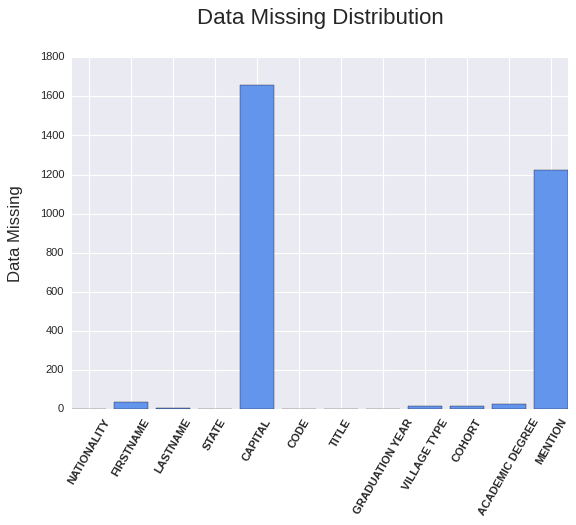

In [12]:
color = ["cornflowerblue" for i in np.arange(len(graduates2006_2017.columns))]

fig, ax = plt.subplots()
ax.bar(features, arr_data_missing, color=color)
ax.set_title("Data Missing Distribution", fontsize=20, pad=30)
ax.set_xticks(np.arange(len(features)), features, rotation=60, weight=800)
ax.set_ylabel("Data Missing", fontsize=15, labelpad=15)
plt.show()

To further clarify the image, we can count how many data we are missing for each Feature, add all these and have an estimate of the missing data compared to the data we have to determine the impact of these missing data on our DataFrame.

We can also see that the Feature 'CAPITAL' and 'MENTION' are the ones with the most missing data.

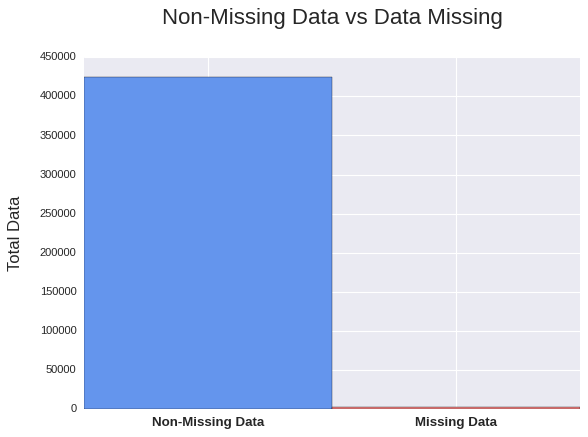

In [13]:
non_missing_data = graduates2006_2017.shape[0] - total_data_missing

fig, ax = plt.subplots()
ax.bar(["Non-Missing Data", "Missing Data"], [non_missing_data, total_data_missing], color=["cornflowerblue", "lightcoral"], width=1)
ax.set_title("Non-Missing Data vs Data Missing", fontsize=20, pad=30)
ax.set_ylabel("Total Data", fontsize=15, labelpad=15)
ax.set_xticks(np.arange(2), ["Non-Missing Data", "Missing Data"], fontsize=12, weight=800)
plt.show()

With a bar graph we can get a better idea of how little missing data we have compared to the non-missing data.

With this information we could decide if we eliminate these missing data and work only with the ones we have complete or on the other hand study this small set of missing data to see if we find something interesting.

In this case we keep that small group of missing data to try to draw conclusions about it later and later treat these missing data more rigorously.

### Feature Correction

Continuing with the cleaning and correction of our DataFrame now We will focus on exploring those Features that have potential to be wrong structured from their origin.

An error in the Features that we already detected before is in the 'YEAR OF GRADUATION' column where the years should be a variable of discrete numeric type.

We will fix this and other errors in our DataFrame.

In [14]:
graduates2006_2017["GRADUATION YEAR"] = graduates2006_2017["GRADUATION YEAR"].astype('int64')

graduates2006_2017.dtypes

NATIONALITY        object
FIRSTNAME          object
LASTNAME           object
STATE              object
CAPITAL            object
CODE               object
TITLE              object
GRADUATION YEAR     int64
VILLAGE TYPE       object
COHORT             object
ACADEMIC DEGREE    object
MENTION            object
dtype: object

In this simple way we fix the type of our Feature 'GRADUATE YEAR'.

Now we go to sort our DataFrame by its Feature 'GRADUATION YEAR' from the smallest to the largest.

In [21]:
graduates2006_2017.sort_values("GRADUATION YEAR")

,NATIONALITY,FIRSTNAME,LASTNAME,STATE,CAPITAL,CODE,TITLE,GRADUATION YEAR,VILLAGE TYPE,COHORT,ACADEMIC DEGREE,MENTION
125894,VENEZOLANA,LOPEZ CEDEÑO,ENILCE YANNELIS,FALCON,CORO,CSO,PRODUCCION DE MEDIOS DE COMUNICACION,2007,SEDE,2006-II,TSU,S/M
125950,VENEZOLANA,CALLES HERNANDEZ,MARIA FERNANDA,FALCON,CORO,GAM,EVALUACION AMBIENTAL,2007,SEDE,2006-II,TSU,S/M
125951,VENEZOLANA,CAMBERO GOMEZ,VANESSA CAROLINA,FALCON,CORO,GAM,EVALUACION AMBIENTAL,2007,SEDE,2006-II,TSU,S/M
125952,VENEZOLANA,CARDENAS ARIAS,LINDA ROSANA,FALCON,CORO,GAM,EVALUACION AMBIENTAL,2007,SEDE,2006-II,TSU,S/M
125953,VENEZOLANA,CASTEJON PETIT,NESTOR JOSE,FALCON,CORO,GAM,EVALUACION AMBIENTAL,2007,SEDE,2006-II,TSU,S/M
...,...,...,...,...,...,...,...,...,...,...,...,...
39091,VENEZOLANA,TREJO RANGEL,JACKELIN,COJEDES,SAN CARLOS,CSO,PRODUCCION MEDIOS DE COMUNICACION,2017,MUNICIPALIZADO,2017-I,TSU,S/M
39090,VENEZOLANA,SILVA SEQUERA,LIUSVEIDY ALEXANDRA,COJEDES,SAN CARLOS,CSO,PRODUCCION MEDIOS DE COMUNICACION,2017,MUNICIPALIZADO,2017-I,TSU,S/M
39089,VENEZOLANA,SILVA ROMERO,ALEXANDRA ELENA,COJEDES,SAN CARLOS,CSO,PRODUCCION MEDIOS DE COMUNICACION,2017,MUNICIPALIZADO,2017-I,TSU,S/M
39096,VENEZOLANA,BARRIOS SEVILLA,LIGIA CAROLINA,COJEDES,SAN CARLOS,GAM,GESTION AMBIENTAL,2017,MUNICIPALIZADO,2017-I,LICENCIADO,S/M


Here there is something strange, our data shows us that the smallest 'GRADUATION YEAR' is 2007 and not 2006.
We check this.